In [6]:
from torch_geometric.data import Data
import torch
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath("../evsim"))
from classes.matsim_xml_dataset import MatsimXMLDataset

In [7]:
network_xml_path = "/home/isaacp/repos/EvMatsim/contribs/ev/script_scenarios/utahevscenario/utahevnetwork.xml"
charger_xml_path = "/home/isaacp/repos/EvMatsim/contribs/ev/script_scenarios/utahevscenario/utahevchargers.xml"
charger_dict = {
    "none": 0,
    # in matsim the default charger is a static charger we could update this dictionary
    # to include different charger types along with charger cost and other attributes
    # the graph uses this dictionary to map the charger type to an integer
    "default": 1,
    "dynamic": 2,
}
dataset = MatsimXMLDataset(network_xml_path, charger_xml_path, charger_dict)
graph: Data = dataset.get_graph()

tensor([1., 1., 1.])
tensor([0., 0., 0.])


In [8]:
print(graph)

Data(x=[25170, 1], pos=[25170, 2], edge_index=[2, 33848], edge_attr=[33848, 6])


In [10]:
charger_type_start_idx = -len(dataset.charger_dict)
charger_type = graph.edge_attr[:, charger_type_start_idx:]
print(charger_type.shape)

torch.Size([33848, 3])


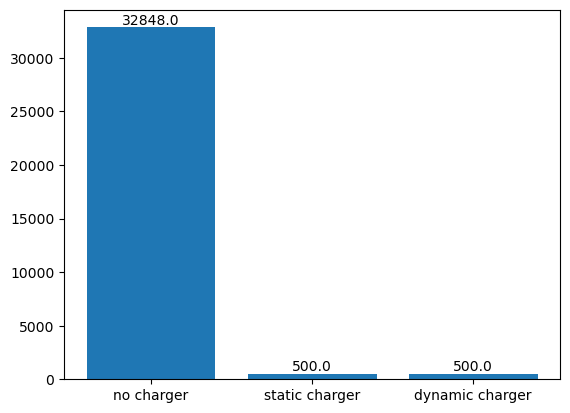

In [11]:
values = [
    torch.sum(charger_type[:, 0]),
    torch.sum(charger_type[:, 1]),
    torch.sum(charger_type[:, 2]),
]
plt.bar(x=["no charger", "static charger", "dynamic charger"], height=values)

for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value.item()), ha="center", va="bottom")

In [12]:
print(dataset.edge_attr_mapping)

{'length': 0, 'freespeed': 1, 'capacity': 2, 'none': 3, 'default': 4, 'dynamic': 5}


In [13]:
for attr, idx in dataset.edge_attr_mapping.items():
    vals = graph.edge_attr[:, idx]

    print(f"{attr}: maxval = {torch.max(vals)}, minval = {torch.min(vals)}")

length: maxval = 1.0, minval = 0.0
freespeed: maxval = 1.0, minval = 0.0
capacity: maxval = 1.0, minval = 0.0
none: maxval = 1.0, minval = 0.0
default: maxval = 1.0, minval = 0.0
dynamic: maxval = 1.0, minval = 0.0
